In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la


def plot_points(x,y):
    plt.figure(figsize=(15, 10))
    plt.plot(x,y,'ob', markersize = 10, markerfacecolor = 'b')
    plt.xlabel('Dani u nedelji')
    plt.ylabel('Broj zarazenih')
    
    
def qudratic_spline(x,y):
    n=len(x)
    dim_A=3*n-4
    A=np.zeros([dim_A,dim_A])
    b=np.zeros([dim_A,1])
     
    A[0,0]=x[0]
    A[0,1]=1
    
    A[1,0]=x[1]
    A[1,1]=1
    
    b[0]=y[0]
    b[1]=y[1]
    
    row_pos=2
    col_pos=2
    for i in range(1,n-1):
        for j in range(3):
            A[row_pos,col_pos+j]=x[i]**(2-j)
            A[row_pos+1,col_pos+j]=x[i+1]**(2-j)
            
            b[row_pos]=y[i]
            b[row_pos+1]=y[i+1]
            
        row_pos=row_pos+2
        col_pos=col_pos+3
        
    A[row_pos,0]=1
    A[row_pos,2]=-2*x[1]
    A[row_pos,3]=-1
        
    row_pos=row_pos+1
    col_pos=2

    for i in range(2,n-1):
        A[row_pos,col_pos]=2*x[i]
        A[row_pos,col_pos+1]=1
        col_pos=col_pos+3
        A[row_pos,col_pos]=-2*x[i]
        A[row_pos,col_pos+1]=-1
        row_pos=row_pos+1
        
    #print(A)
    #print(b)
    
    return np.insert(la.solve(A,b),0,0)


def eval_spline(spline,x,points):
    n=len(points)
    results=np.zeros(n)
    for i in range(n):
        if points[i]<x[0]:
            p=spline[0:2];
            results[i]=np.polyval(p,points[i])
        if points[i]>x[len(x)-1]:
            p=spline[len(spline)-1:len(spline)-1]
            results[i]=np.polyval(p,points[i])
        for j in range(0,len(x)-1):
            if x[j]<=points[i] and points[i]<=x[j+1]:
                p=spline[3*j:3*j+3]
                results[i]=np.polyval(p,points[i])
                break
    return results

# Interpolacija

#### Recimo da imamo podatke o 5 dana u nedelji o broju zaraženih virusom COVID-19 u Srbiji. Podaci su dati u obliku dva vektora. Vektor $x$ sadrži dane u nedelje označene rednim brojevima, dok vektor $y$ sadrži podtaka ob broju zaraženih.

In [2]:
x=range(1,6)
y=[579,1053,1328,1384,1545]

#### Narctaćemo podatke kao tačke na 2d grafiku.

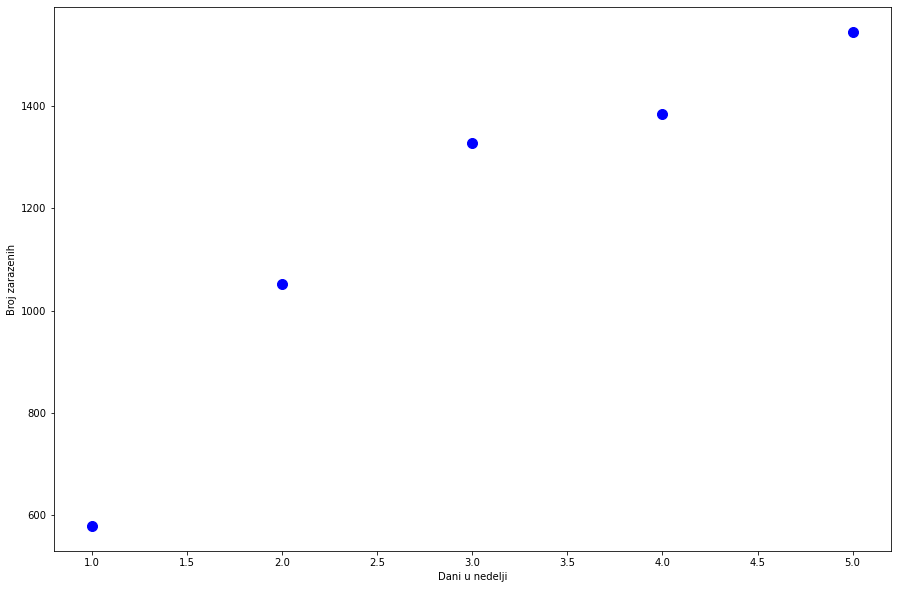

In [3]:
plot_points(x,y)

#### Recimo sada da iz nekog razloga izgubimo podatak o broju zaraženih u danu 3. Da li možemo da ga nadoknadimo, ondnosno procenimo pomoću numeričkih algoritama?

#### Koristimo interpolaciju. Interpolacija je tehnika koja nam omogućava da pronađemo "skrivenu" funkciju koja najbolje opsiuje (najbolje se uklapa u) naše podatke.
#### Konkretnije, interpolacija funkcioniše tako što pronalazi polinom koji **mora** da prođe kroz sve tačke (podatke) koje imamo.
#### Taj polinom se posle može koristiti da procenimo vrednosti koje nam nedostaju u opsegu promenljive $x$ (interpolacija) ili da predvidimo vrednosti van opsega promenljive $x$ (ekstrapolacija). Oba slučaja ćemo prikazati na predavanju.

#### Prikazaćemo prvo kako izgleda interpolacioni polinom za naše podatke **bez dana 3**, a nakon toga načine pomoću koji možemo da ga dobijemo.

In [4]:
x1=list(range(1,6))
x1.remove(3)#brisemo bas broj 3 iz liste

y1=y #brisemo broj sa trece pozicije iz liste
y1.pop(2)

print(x1)
print(y1)

[1, 2, 4, 5]
[579, 1053, 1384, 1545]


[  25.33333333 -280.16666667 1137.16666667 -303.33333333]


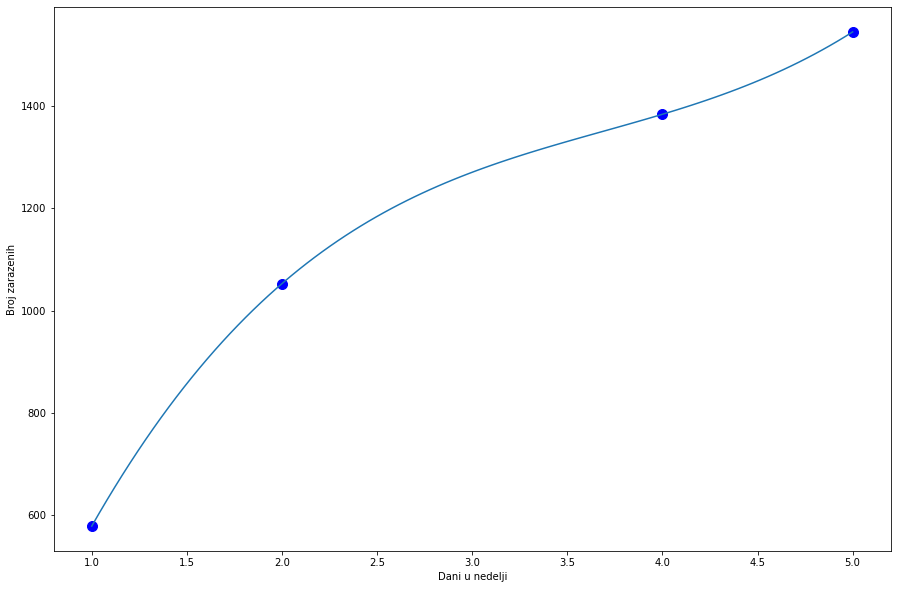

In [5]:
plot_points(x1,y1)

p=np.polyfit(x1, y1, 3)

xp=np.linspace(1,np.max(x1),100)

plt.plot(xp,np.polyval(p,xp))

print(p)
#ovo je polinom koji odgovara vektoru koeficijenata p:
#25.333*x^3 - 280.17*x^2 + 1137.2*x^1 - 303.33

### Interpolacija - prvi način

#### Interpolacioni polinom trećeg stepena formiramo rešavanjem sistema linearnih jedančina.
#### Šta mislite zašto formiramo polinom baš trećeg stepena? (Mala pomoć: imamo 4 tačke. Ako imamo dve tačke kog stepena je polinom koji prolazi kroz njih?)
#### Opšti oblik polinoma trećeg stepena:

### $$p(x)=a_1x^3+a_2x^2+a_3x+a_4$$

#### Možda ste primetili da smo koeficijente poređali tako da je onaj sa namanjim indeksom ($a_1$) uz najveći stepen ($x^3$) i tako redom. To je zato što alati koje koristimo reprezentuju polinome kao vektore koeficijenata, tako da prvom indeksu u vektoru odogvara koeficijent uz najveći stepen, a drugom koeficjent uz stepen manje itd.

#### Sistem linearih jednačina pomoću koga dobijemo polinom formiramo tako što koristimo uslove koje polinom mora da zadovolji.
#### Konkretno, polinom mora da prođe kroz sve tačke koje imamo. To znači da za svako $x$ iz podataka $p(x)$ mora da bude jednko odgovarajućem $y$.
#### Za naš primer uslovi su sledećeg oblika:
#### $$x=(1,2,4,5)\\y=(579,1053,1384,1545)\\p(1)=579, p(2)=1053, p(4)=1384, p(5)=1545$$

#### $$a_1\cdot1^3+a_2\cdot1^2+a_3\cdot1+a_4=579\\a_1\cdot2^3+a_2\cdot2^2+a_3\cdot2+a_4=1053\\a_1\cdot4^3+a_2\cdot4^2+a_3\cdot4+a_4=1384\\a_1\cdot5^3+a_2\cdot5^2+a_3\cdot5+a_4=1545$$

#### Dobili smo sistem od 4 jednačine sa 4 nepoznate, gde su nam koeficijenti polinoma nepoznate. Rešavanjem sistema dobijamo polinom.
#### Matrica sistema ima sledeći oblik:

#### $$A=\begin{bmatrix}
1^3 & 1^2 & 1 & 1\\
2^3 & 2^2 & 2 & 1\\
4^3 & 4^2 & 4 & 1\\
5^3 & 5^2 & 5 & 1\\
\end{bmatrix}$$

#### Ovakve matrice imaju i opšti oblik i nazivaju se Vandermondove matrice:

### $$A=\begin{bmatrix}
x_1^{n-1} & x_1^{n-2} & \dots & x_1 & 1\\
x_2^{n-1} & x_2^{n-2} & \dots & x_2 & 1\\
\dots & \dots  & \dots & \dots & \dots\\
x_n^{n-1} & x_n^{n-2} & \dots & x_n & 1\\
\end{bmatrix}$$

#### Vandermodove matrice generalno imaju veliki kondicioni broj, kao što ćete videti u nastavku, pa se način na koji sada određujemo interpolacioni polinom ne preporučuje. Zato učimo i druge metode za interpolaciju.

#### Pišemo sada kod za formiranje matrice A za naš primer.
#### Formiramo prvo matricu koja sadrži samo jedinice.

In [6]:
A=np.ones((len(x1),len(x1)))
print(A)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


#### Nakon toga dodajemo redom kolone tako što podižemo ceo vektor $x1$ na odgovarajući stepen, redom od 3 pa do 1.

In [7]:
for i in range(len(x1)-2,-1,-1):
    A[:,i]=A[:,i+1]*x1

print(A)

[[  1.   1.   1.   1.]
 [  8.   4.   2.   1.]
 [ 64.  16.   4.   1.]
 [125.  25.   5.   1.]]


In [8]:
print(la.cond(A))

1228.8350337366235


#### Vidimo da je kondicioni broj veliki.

#### Formiramo vektor $b$ pomoću vektora $y1$ i nakon toga rešavamo sistem.

In [9]:
b=y1

In [10]:
p=la.solve(A,b)

print(p)

[  25.33333333 -280.16666667 1137.16666667 -303.33333333]


In [11]:
p_pomocu_SLAJ=p #cuvamo ovaj polinom da bi ga kasnije uporedili sa polinomima dobijenim drugim metodama.

#### Izračunavamo sada procenu broja zaraženih za vrednost $x=3$, odnosno treći dan.
#### Koristimo ugrađenu funkciju $polyval$ koja izračunava vrednost polinoma u tački.

In [12]:
predikcija = np.polyval(p,3)
print(predikcija)

1270.6666666666667


In [13]:
tacna_vrednost = y[2]
print(tacna_vrednost)

1384


#### Vidimo da je naša procena (1270) relativno blizu tačnoj vrednosti od 1328 zaraženih.

#### Prikazujemo sada interpolacioni polinom, kao i predikciju i tačnu vrednost za $x=3$.

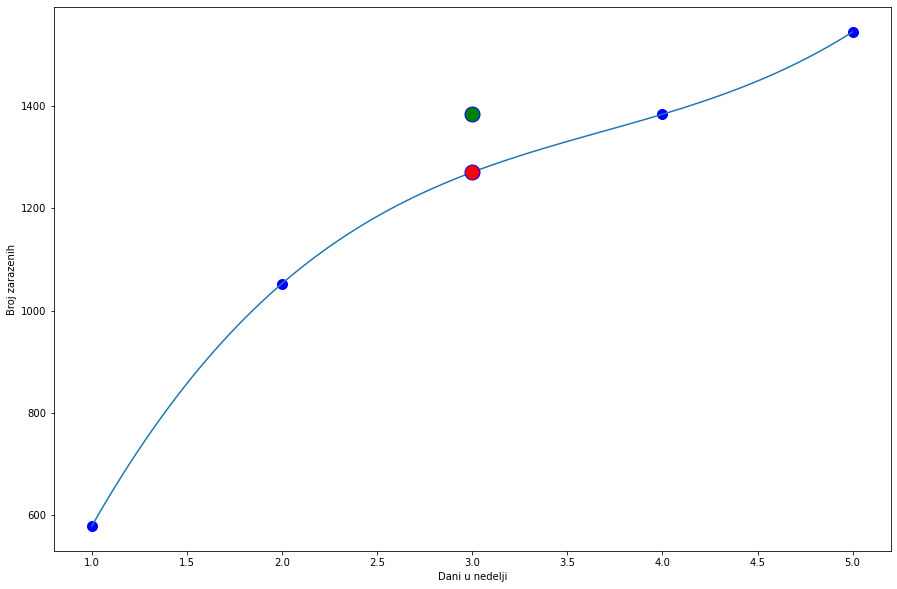

In [14]:
plot_points(x1,y1)
xp=np.linspace(1,np.max(x1),100);
plt.plot(xp,np.polyval(p,xp))

plt.plot(3,np.polyval(p,3),'ob',markersize=15,markerfacecolor='r')

plt.plot(3,y1[2],'ob',markersize=15,markerfacecolor='g')

## Lagranžov interpolacioni polinom

#### Lagranžov interpolacioni polinom ima oblik:
### $$p(x)=y_1(x)\cdot L_1(x)+y_2(x)\cdot L_2(x)+\dots+y_n(x)\cdot L_n(x)$$
#### , gde su $L_1(x),L_2(x),\dots,L_n(x)$ polinomi čiji ćemo oblik objasniti.

#### U suštini mi imamo "naređane" sve vrednosti za $y$ u zbiru gore, i sad treba da obezbedimo da $p(x)$ zadovoljava uslove interpolacionog polinoma. 
#### Konkretnije, treba da polinome $L_i$ formiramo tako da važi $p(x_i)=y_i$ za $i={1,\dots,n}$.
#### Dakle, hоćemo da kada na primer ubacimo $x_1$ u polinom $p$ da svi polinomi $L_i$ $i={2,\dots,n}$ budu jednaki nuli osim baš $L_1$ koji treba da bude jednak jedan. Formalnije, treba da važi:
### $$L_i(x_j)=\begin{cases}1&i=j\\0&i\ne j\end{cases}$$

#### Sada ćemo na primeru tri tačke i interpolacionog polinoma drugog stepena pokazati kako je Lagranž kreirao polinome $L_i$.
#### Za date tri tačke $(x_1,y_1)$,$(x_2,y_2)$ i $(x_3,y_3)$ Lagranžov interpolacioni polinom je oblika:
### $$p(x)=y_1\frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}+y_2\frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}+y_3\frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}$$

#### Proverićemo sada da li Lagranžov polinom zadovoljava uslove interpolacije:
### $$p(x_1)=y_1\frac{(x_1-x_2)(x_1-x_3)}{(x_1-x_2)(x_1-x_3)}+y_2\frac{(x_1-x_1)(x_1-x_3)}{(x_2-x_1)(x_2-x_3)}+y_3\frac{(x_1-x_1)(x_1-x_2)}{(x_3-x_1)(x_3-x_2)}=y_1\cdot 1 + 0 + 0 = y_1
\\p(x_2)=y_1\frac{(x_2-x_2)(x_2-x_3)}{(x_1-x_2)(x_1-x_3)}+y_2\frac{(x_2-x_1)(x_2-x_3)}{(x_2-x_1)(x_2-x_3)}+y_3\frac{(x_2-x_1)(x_2-x_2)}{(x_3-x_1)(x_3-x_2)}= 0 + y_2\cdot 1 + 0 = y_2
\\p(x_3)=y_1\frac{(x_3-x_2)(x_3-x_3)}{(x_1-x_2)(x_1-x_3)}+y_2\frac{(x_3-x_1)(x_3-x_3)}{(x_2-x_1)(x_2-x_3)}+y_3\frac{(x_3-x_1)(x_3-x_2)}{(x_3-x_1)(x_3-x_2)}= 0 + 0 + y_3\cdot 1 = y_3$$

#### Napisaćemo sada kod za Lagranžovu interpolaciju.
#### Prvo ćemo pokazati na koji način u programskom jeziku Python možemo odrediti proizvod polinoma. Koristimo konvoluciju:

In [15]:
pol1=np.array([1.,2.])
pol2=np.array([3.,4.,5.])
proizvod = np.convolve(pol1,pol2)

print(proizvod)

[ 3. 10. 13. 10.]


In [16]:
#pol1=1*x^1 + 2
#pol2=3*x^2 + 4*x^1 + 5
#proizvod=3*x^3 + 10*x^2 + 13*x^1 + 10

In [17]:
#ovo je kratko objašnjenje konvolucije koja vam može biti zanimljivo ako vas interesuje veštačka inteligencija, ali nije deo gradiva:
#okrećemo drugi vektor i pomeramo ga tako da se poslednji element prvog i prvi element drugog poravnaju 
#jer hoćemo da dva vektora "prođu jedan pored drugog kao da idu jedan drugom u susret".
#dok prolaze računa se skalarni proizvod. To je po definiciji konvolucija, kao da vučemo 1d filter po funkciji.
#Konvolucija je iz oblasti procesiranja signala. Ako signal posmatramo kao talas onda zelimo da se pocetak prvog i drugog talasa poravnaju. 
#Ako ne radimo obratanje onda je to unarksna korelacija (cross corellation).
#Na predavanju prikazujemo sliku kao ilustaciju obe operacije. Na prvoj slici poravnavaju se pocetak f i pocetak g, dok na drugoj (auto corellation) pocetak f i kraj g.
#    [1 2]
#[5 4 3]
#-----------
#  [1 2]
#[5 4 3]
#-----------
#[1 2]
#[5 4 3]
#----------
#[1 2]
#  [5 4 3]
rezultat_konvolucije = [1*3,1*4+2*3,1*5+2*4,5*2]
print(rezultat_konvolucije)
print(np.convolve(pol1,pol2))

[3, 10, 13, 10]
[ 3. 10. 13. 10.]


#### Implementiramo sada Lagranžov polinom. Krenućemo od dve tačke i interpolacionog polinoma koji ih povezuje, a to je prava:
#### $$p(x)=y_1\frac{(x-x_2)}{(x_1-x_2)}+y_2\frac{(x-x_1)}{(x_2-x_1)}$$

In [18]:
x=[1., 2., 4., 5.]
y=[579., 1053., 1384., 1545.]

print(x)
print(y)

[1.0, 2.0, 4.0, 5.0]
[579.0, 1053.0, 1384.0, 1545.0]


In [19]:
x = x[1:3]
y = y[1:3]

print(x)
print(y)

[2.0, 4.0]
[1053.0, 1384.0]


#### Formiramo prvi sabirak polinoma $p$:

In [20]:
p1 = y[0]*np.array([1, -x[1]])/(x[0]-x[1])

print(p1)

[-526.5 2106. ]


#### Vektor $[1, -x[1]]$ je polinom $(x-x_2)$.
#### Proveravamo da li p1 zadovoljava uslove iterpolacije.

In [21]:
np.polyval(p1,x[0])

1053.0

In [22]:
np.polyval(p1,x[1])

0.0

#### Na sličan način formiramo i drugi sabirak

In [23]:
p2 = y[1]*np.array([1, -x[0]])/(x[1]-x[0])

print(p2)

[  692. -1384.]


In [24]:
np.polyval(p2,x[1])

1384.0

In [25]:
np.polyval(p2,x[0])

0.0

#### Pomoću sabiraka formiramo interpolacioni polinom i onda ga crtamo.

In [26]:
p = p1 + p2

print(p)

[165.5 722. ]


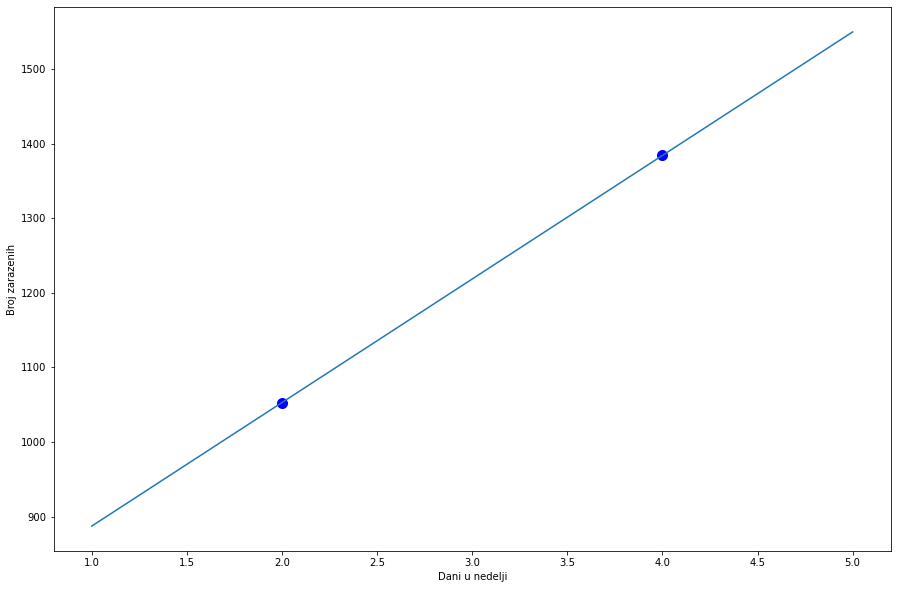

In [27]:
plot_points(x,y)

xp=np.linspace(1,max(x)+1,100)
plt.plot(xp,np.polyval(p,xp))

#### Koristimo sada tri tačke i proširujemo kod da tako da formiramo:
### $$p(x)=y_1\frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}+y_2\frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}+y_3\frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}$$

In [28]:
x=[1., 2., 4., 5.]
y=[579., 1053., 1384., 1545.]

x = x[0:3]
y = y[0:3]

print(x)
print(y)

[1.0, 2.0, 4.0]
[579.0, 1053.0, 1384.0]


In [29]:
p1 = y[0]*np.convolve(np.array([1, -x[1]])/(x[0]-x[1]),np.array([1, -x[2]])/(x[0]-x[2]))

In [30]:
print(p1)

[  193. -1158.  1544.]


In [31]:
print(np.polyval(p1,x[0]))
print(np.polyval(p1,x[1]))
print(np.polyval(p1,x[2]))

579.0
0.0
0.0


In [32]:
p2 = y[1]*np.convolve(np.array([1, -x[0]])/(x[1]-x[0]),np.array([1, -x[2]])/(x[1]-x[2]))

In [33]:
print(p2)

[ -526.5  2632.5 -2106. ]


In [34]:
print(np.polyval(p2,x[0]))
print(np.polyval(p2,x[1]))
print(np.polyval(p2,x[2]))

0.0
1053.0
0.0


In [35]:
p3 = y[2]*np.convolve(np.array([1, -x[0]])/(x[2]-x[0]),np.array([1, -x[1]])/(x[2]-x[1]))

In [36]:
print(np.polyval(p3,x[0]))
print(np.polyval(p3,x[1]))
print(np.polyval(p3,x[2]))

-5.684341886080802e-14
-5.684341886080802e-14
1383.9999999999998


#### Hajde na kratko da polgedamo zašto na primer rezultat $p_3(x_1)$ nije jednak tačno nuli.

In [37]:
print(p3)

[ 230.66666667 -692.          461.33333333]


In [38]:
print(np.array([1, -x[0]]))
print(x[2]-x[0])
print(np.array([1, -x[0]])/(x[2]-x[0]))

[ 1. -1.]
3.0
[ 0.33333333 -0.33333333]


In [39]:
print(np.array([1, -x[1]]))
print(x[2]-x[1])
print(np.array([1, -x[1]])/(x[2]-x[1]))

[ 1. -2.]
2.0
[ 0.5 -1. ]


In [40]:
#p3=230.66666667*x^2 - 692*x + 461.33333333
#p3(x1)=p3(1)=230.66666667 - 692 + 461.33333333

tmp1=230.66666667-692. #x1=1 napomena
tmp2=461.33333333
print(tmp1)
print(tmp2)
tmp1+tmp2

-461.33333332999996
461.33333333


5.684341886080802e-14

#### Obasnićemo sada zašto nismo dobili tačno nula.
#### Prilikom formiranja p_3 imamo deljenje sa 3 u delu (x[2]-x[0]). Tako dobijamo situaciju gde moramo da na računar smestimo beskonačan niz trojki iza decimalne tačke. Tom prilikom gubimo na tačnosti. Razloge za gubitak ilustrovaćemo prikazom koverzije broja 0.33 u binaran.
#### Kao što ćete videti u nastavku, broj 0.33 ne može nikada tačno da se konvertuje u binaran broj, odnosno algoritam za konverziju se nikada ne zavaršava pa mora da se prekine kada se napuni kapacitet računara. Iz tog razloga 0.33 nije na računaru nikad 0.33 iako nam računar prikazuje tako.
#### Pogledajmo sledeći kod za konverziju:

In [41]:
a = 0.33 # realan broj
n = 16   # broj bitova za celobrojni deo (pre decimalne tačke)     
m = 25   # broj bitova za razlomački deo (posle decimalne tačke)   
# binaran broj
d2b = np.fix(
    np.remainder(
        a*np.power(
            2.,
            np.arange(
                -(n-1),
                m
            )
        ),
        2
    )
)
#np.arange(-(n-1),m) - stepeni broja 2.0 od -(n-1) do m,np.remainder(a*np.power(2.,np.arange(-(n-1),m)),2) ostatak pri deljenju vektora a*np.power sa 2,
#fix uzima prvu cifru pre decimalne tacke od ostatka.
#u procesu konverzije broja 0.33 nikad ne dobijamo ostatak 0 pri deljenju sa 2 zato uvek imamo periodu koliko god da povecavamo m

#napomena oko algoritma, recimo da uzmemo broj 8, ((8/2)/2)/2=1, a to je isto sto i 8/2^3 ili 8*2^-3, dok je rem(((8/2)/2)/2,2)=1

print(d2b)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1.]


In [42]:
m = 75;
d2b = d2b = np.fix(np.remainder(a*np.power(2.,np.arange(-(n-1),m)),2))

print(d2b)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Vidimo da imamo periodu 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. koja se ponavlja koliko god da proširimo broj cifara za reprezentaciju decimalnog dela. Algoritam se nikada ne završava, tj. 0.33 nije nikad tačno reprezentovan na računaru.
#### Proverićemo ovu tvrdnju na još jedan način.

In [43]:
tmp_p=0
for i in range(10):
    tmp_p=tmp_p+0.33

tmp_p
tmp_p==3.3

print(tmp_p)

3.3000000000000003


#### Vidimo da 3.3 nije isto što i kada 10 puta na računaru saberemo 0.3.
#### Postoji puno ovkavih slučajeva, npr. 0.1, i toga moramo da budemo svesni dok radimo na računaru.
#### Daćemo sada primer broja 0.1875 koji je moguće tačno konvertovati u binaran. Nemamo periodu već samo nule nakon što se konverzija završi. Sam algoritam konverzije obrađujemo na posebnom predavanju.

In [44]:
m = 25
a = 0.1875
d2b = np.fix(np.remainder(a*np.power(2.,np.arange(-(n-1),m)),2))

print(d2b)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [45]:
print(2.**-4.+2.**-3.)

0.1875


In [46]:
#dodatna demonstracija koraka konverzije - deo informativnog gradiva
a = 5.1875
n = 3
m = 10
print(np.arange(-(n-1),m))
print(np.power(2.,np.arange(-(n-1),m)))
print(a*np.power(2.,np.arange(-(n-1),m)))
print(np.remainder(a*np.power(2.,np.arange(-(n-1),m)),2))
print(np.fix(np.remainder(a*np.power(2.,np.arange(-(n-1),m)),2)))
print(2.**-3+2.**-4)

[-2 -1  0  1  2  3  4  5  6  7  8  9]
[2.50e-01 5.00e-01 1.00e+00 2.00e+00 4.00e+00 8.00e+00 1.60e+01 3.20e+01
 6.40e+01 1.28e+02 2.56e+02 5.12e+02]
[1.296875e+00 2.593750e+00 5.187500e+00 1.037500e+01 2.075000e+01
 4.150000e+01 8.300000e+01 1.660000e+02 3.320000e+02 6.640000e+02
 1.328000e+03 2.656000e+03]
[1.296875 0.59375  1.1875   0.375    0.75     1.5      1.       0.
 0.       0.       0.       0.      ]
[1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
0.1875


#### Dakle, naš polinom $p_3$ nije pogrešan već je posledica ograničenog kapaciteta računara za smeštanje brojeva. Iz tog razloga nastavljamo sa formiranjem Lagranžovog polinoma.

#### Ponavljamo formulu po treći put da bi lakše ispratili kod:
### $$p(x)=y_1\frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}+y_2\frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}+y_3\frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}$$

In [47]:
def linterp(x,y):
    n = len(x)
    p = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L = np.convolve(np.array( [1, -x[j]] )/( x[i]-x[j] ), L)
        p = p + y[i]*L
    return p

#### Testiramo napisanu funkciju.

In [48]:
x=range(1,6)
y=[579,1053,1328,1384,1545]

p=linterp(x,y)

print(p)

[  14.33333333 -146.66666667  422.16666667   19.16666667  270.        ]


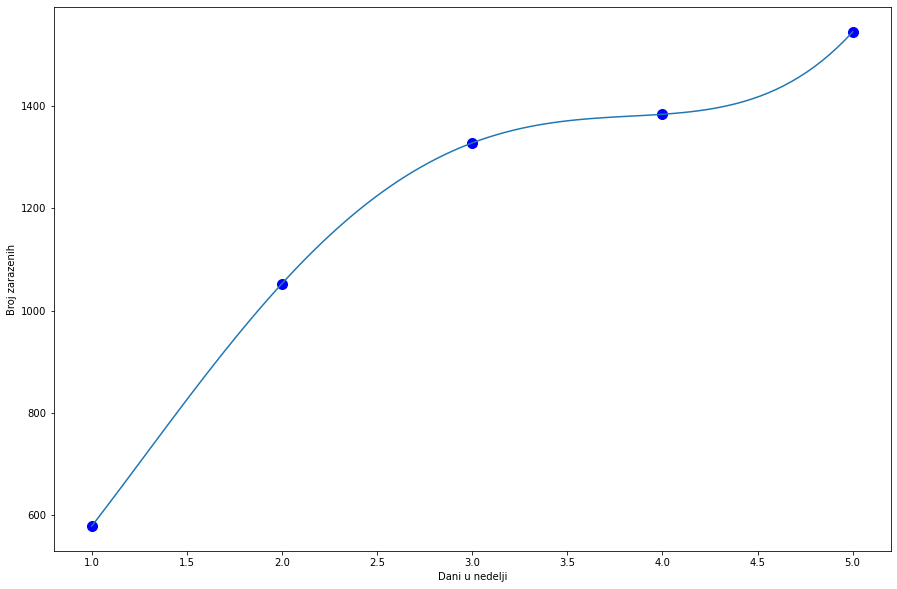

In [49]:
plot_points(x,y)

xp=np.linspace(1,np.max(x1),100)

plt.plot(xp,np.polyval(p,xp))

#### Koristimo sada tačke (dane) 1, 2, 4 i 5 za interpolaciju, a nakon toga procenjujemo vrednost za dan 3.

In [50]:
x1=[1.,2.,4.,5.]
y=[579,1053,1384,1545]

p=linterp(x1,y1)

print(p)
print(p_pomocu_SLAJ)

print(np.polyval(p,3))

[  25.33333333 -280.16666667 1137.16666667 -303.33333333]
[  25.33333333 -280.16666667 1137.16666667 -303.33333333]
1270.666666666672


#### Vidimo da je Lagranžova intepolacija proizvela isti polinom kao metod pomoću sistema linearnih jednačina. To je zato što je interpolacioni polinom jedinstven. Iako postoji formalan dokaz, dovoljno je da razmislimo o tome koliko pravih može da se povuče kroz dve date tačke.

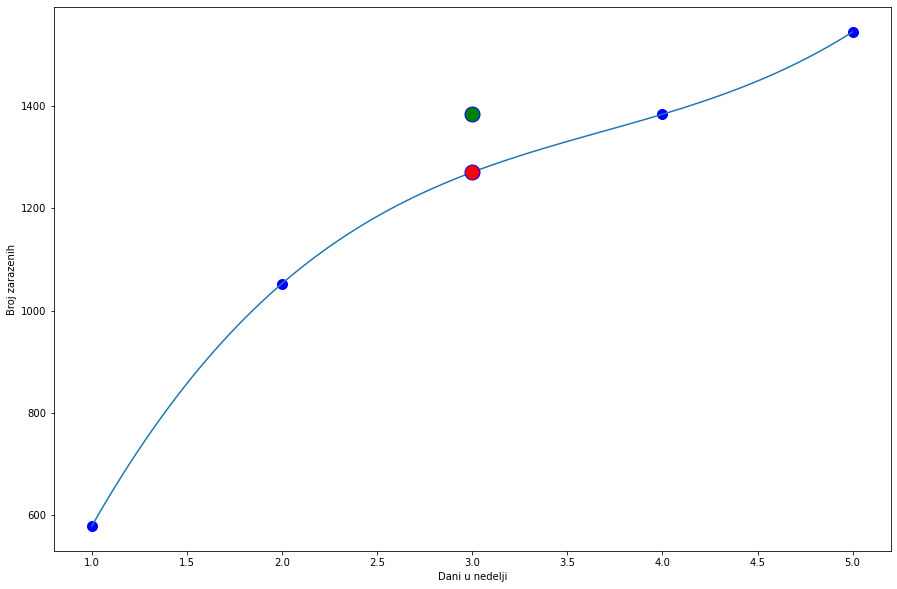

In [51]:
plot_points(x1,y1)
xp=np.linspace(1,np.max(x1),100)
plt.plot(xp,np.polyval(p,xp))

plt.plot(3,np.polyval(p,3),'ob',markersize=15,markerfacecolor='r')

plt.plot(3,y1[2],'ob',markersize=15,markerfacecolor='g')

In [52]:
predikcija_p_pomocu_SLAJ = np.polyval(p_pomocu_SLAJ,3)

print(predikcija_p_pomocu_SLAJ)

1270.6666666666667


In [53]:
predikcija_p_linterp = np.polyval(p,3)

print(predikcija_p_linterp)

1270.666666666672


In [54]:
tacna_vrednost = y1[2]

print(tacna_vrednost)

1384


## Interpolacija splajnom

#### Interpolacione metode koje smo do sada radili nisu pogodne za upotrebu kada je broj interpolacionih tačaka veći.
#### Kada je broj interpolacionih tačaka veći interpolacioni polinom postaje "nestabilan", tj. ima velike oscilacije (nagle skokove i padove) što se može prepoznati po velikim apsolutnim vrednostima koeficijenata.
#### Intuitivno, nestabilnost je posledica interpolacionih uslova, odnosno zahteva da jedan polinom prođe baš kroz sve tačke.

#### Nestabilost interpolacionog polinoma ilustrovaćemo na primeru od 10 dana i broja zaraženih u Srbiji.

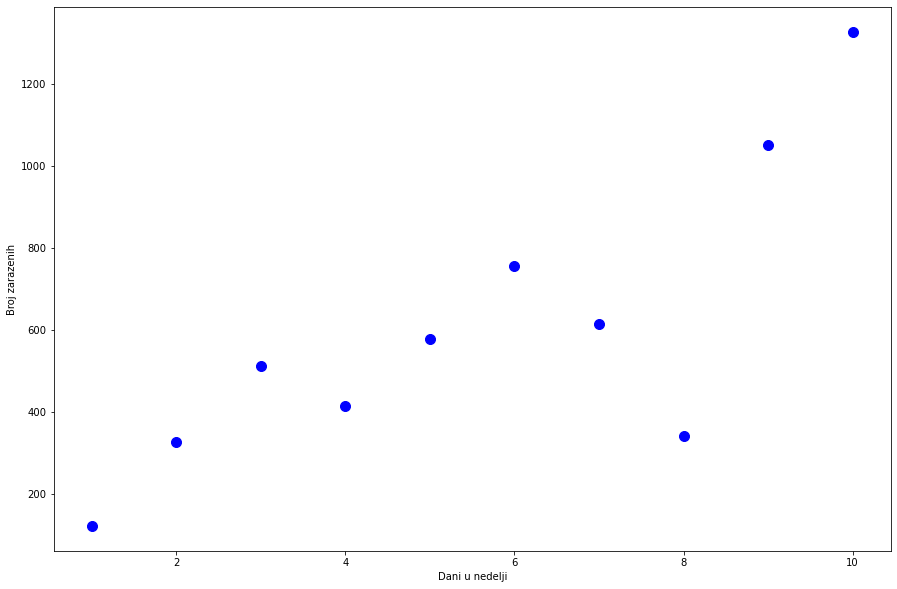

In [55]:
x=range(1,11)
y=[122.,  326.,  512.,  416.,  579.,  757.,  614.,  341., 1053., 1328.]
plot_points(x,y)

In [56]:
p=linterp(x,y)

print(p)

[-1.56994048e-02  7.61259921e-01 -1.60984623e+01  1.94538194e+02
 -1.47228455e+03  7.16194757e+03 -2.20494251e+04  4.05832530e+04
 -3.93856762e+04  1.51050000e+04]


#### Vidimo da $p$ ima dosta velike vrednosti koeficijenata.

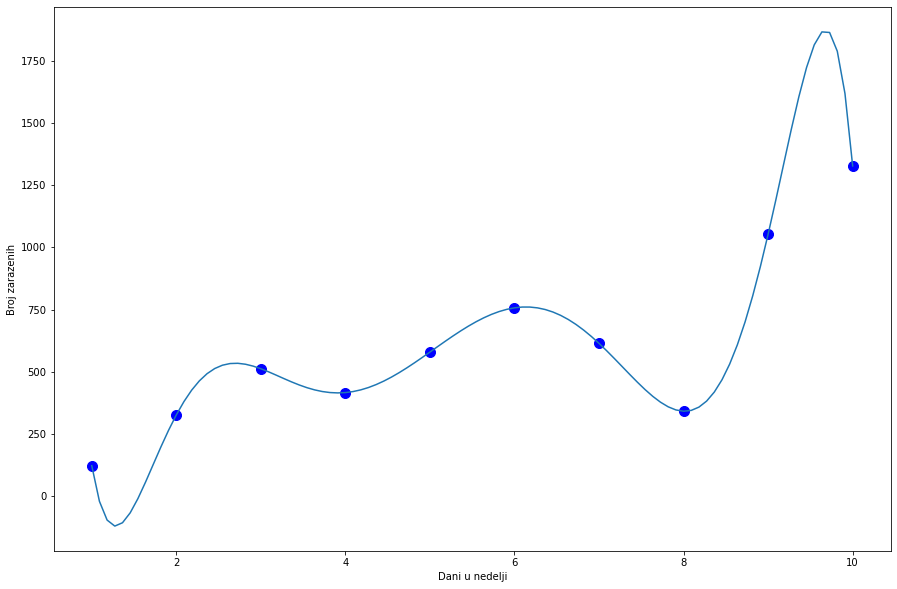

In [57]:
plot_points(x,y)

xp=np.linspace(1,np.max(x),100)
plt.plot(xp,np.polyval(p,xp))

#### Sa grafika se vidi da $p$ ima nagle uspone i padove.

In [58]:
np.polyval(p,1.5)

-41.04499816846328

#### Ako recimo izračunamo vrednost $p$ u tački 1.5 dobijamo da je broj zaraženih negativan???

In [59]:
np.polyval(p,9.7)

1872.2569565645917

In [60]:
np.polyval(p,10)

1328.0000007743365

#### U ovom slučaju promena x za 0.3 rezultuje skokom od preko 500 zaraženih što je previše nagli skok.
#### Cilj nam je da $p$ što realnije oslikava podatke koje imamo.

## Algoritam interpolacije splajnom

#### Interpolacija splajnom je deo-po-deo interpolacija i funkcioniše tako što se između svake dve date tačke formira poseban interpolacioni polinom.
#### Rezultat interpolacije splajnom nije jedan polinom nego skup polinoma.

### Linearni splajn

#### Kod ovog splajna između svake dve tačke formiramo pravu.
#### Za datih $n$ tačaka rezultat je $n-1$ prava, zato što toliko imamo pod-intervala.
#### Nacrtaćemo sada linearni splajn za naš primer sa 10 tačka.

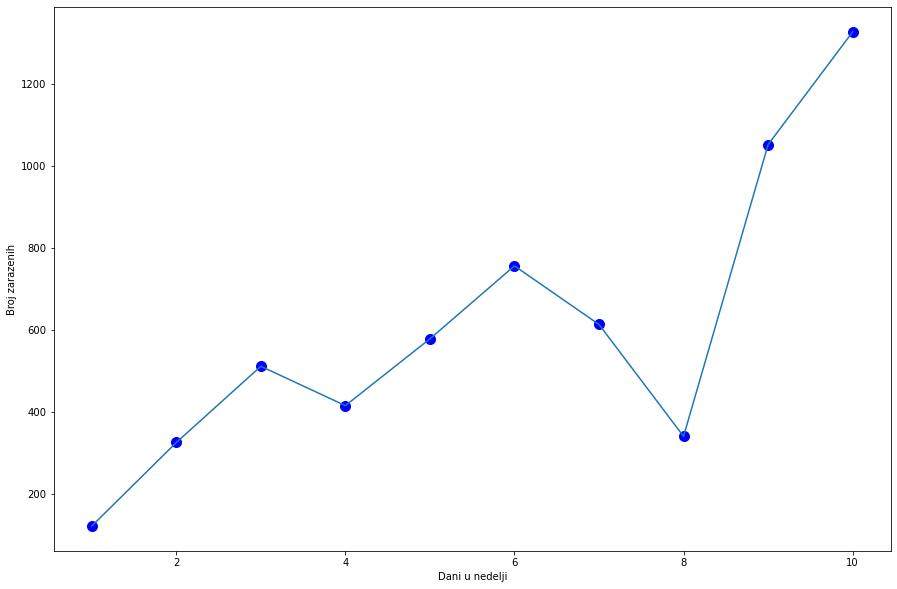

In [61]:
from scipy.interpolate import interp1d 

x=range(1,11)
y=[122.,  326.,  512.,  416.,  579.,  757.,  614.,  341., 1053., 1328.]

plot_points(x,y)

xp=np.linspace(1,np.max(x),100)

p = interp1d(x, y, kind='linear') 
yy = p(xp)#rezultat interpolacije u ovom slucaju je funkcija kojoj mogu da se proslede vrednosti za koje zelimo da dobijemo y

plt.plot(xp,yy)

#### Splajnove koristimo tako što za odgovarajuću tačku koju hoćemo da ubacimo u splajn pronađemo tačke između kojih se nalazi i onda ubacimo tačku u pravu između njih. U Octave za nas to automatski obavlja funkcija ppval.

#### Očigledno je da, iako je veoma jednostavn, linerani splajn je veoma gruba interpolacija jer je retko slučaj da je prelaz iz jedne u drugu tačku baš linearan.
#### Pored toga linearni splajn ima nagle promene nagiba (izvoda) u datim tačkama što znači da se njegov oblik naglo menja na prelazima iz jedne tačke u drugu. Ako u našim podacima postoji trend, vrlo je verovtano da ne sadrži tako nagle prelaze, pa bi bilo dobro da pronađemo bolji način za interpolaciju.

### Kvadratini splajn

#### Kao što samo ime kaže u ovom slučaju između svake dve tačke formiramo polinom drugog stepena.
#### Za razliku od linearnog splajna, prelazi između tačka neće biti nalgli jer kao uslov za formiranje kvadratni splajn zahteva da izvodi u unutrašnjim tačkama (gde se dva splajna spajaju) budu jednaki. Dakle, nagib kojim se jedan splajn završava isti je kao i nagib kojim sledeći splajn počinje. Sada imamo glatke prelaze, a ne špiceve.
#### Crtamo kvadratni splajn za naš primer sa 10 tačaka.

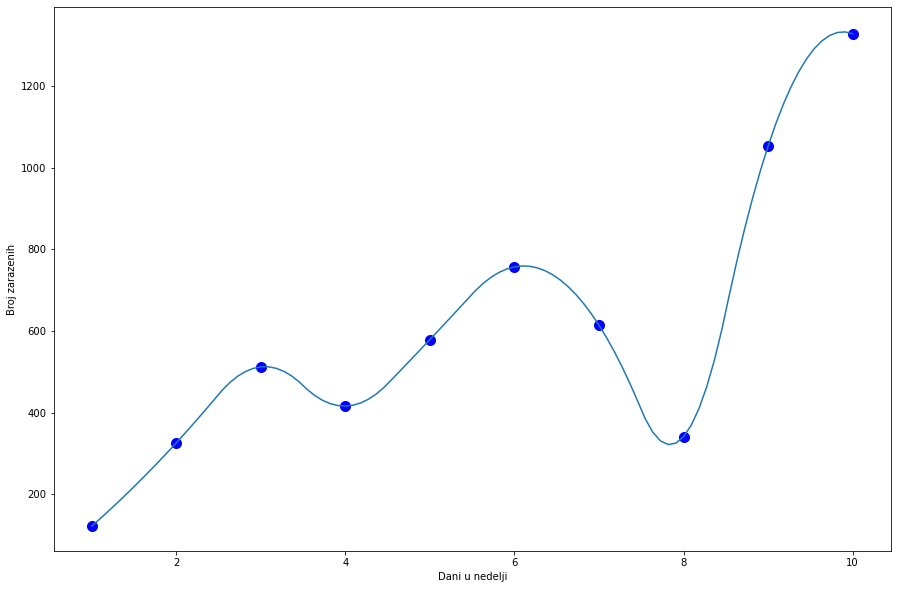

In [62]:
x=range(1,11)
y=[122.,  326.,  512.,  416.,  579.,  757.,  614.,  341., 1053., 1328.]

plot_points(x,y)

xp=np.linspace(1,np.max(x),100)

p = interp1d(x, y, kind='quadratic') 
yy = p(xp) 

plt.plot(xp,yy)

#### Kao što vidimo kod kvadratnog splajna prelazi u intepolacionim tačkama su blaži. Nemamo špiceve, tj. prekide prvog izvoda kao kod linearnog splajna.
#### Uporedićemo sada kvadratni splajn i Lagranžov interpolacioni polinom.

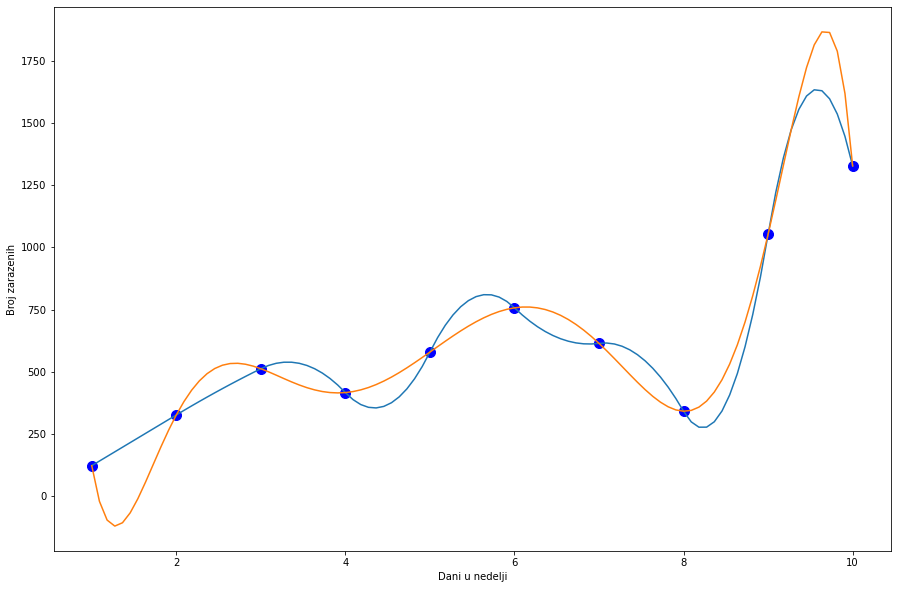

In [63]:
x=range(1,11)
y=[122.,  326.,  512.,  416.,  579.,  757.,  614.,  341., 1053., 1328.]

plot_points(x,y)

xp=np.linspace(1,np.max(x),100)

my_kv_splajn = qudratic_spline(x,y)
yy = eval_spline(my_kv_splajn,x,xp)

plt.plot(xp,yy)

linterp_pol=linterp(x,y)

plt.plot(xp,np.polyval(linterp_pol,xp))

In [64]:
print(np.polyval(linterp_pol,1.5))
print(eval_spline(my_kv_splajn,x,[1.5]))

-41.04499816846328
[224.]


In [65]:
print([y[8], y[9]])
print(np.polyval(linterp_pol,9.5))
print(eval_spline(my_kv_splajn,x,[9.5]))

[1053.0, 1328.0]
1773.264816865354
[1625.25]


#### Očigledno je da kvadratni splajn nema oscilacije koje ima Lagražnov interpolacioni polinom. Nema negativnih vrednosti u tački 1.5. Takođe prelaz između tačka 9 i 10 je mnogo blaži, tj. realniji.
#### Pokazaćemo sada kako izgleda svaki od polinoma kvadratnog splajna.

In [66]:
my_kv_splajn = qudratic_spline(x,y)

print(my_kv_splajn)

[ 0.00000e+00  2.04000e+02 -8.20000e+01 -1.80000e+01  2.76000e+02
 -1.54000e+02 -2.64000e+02  1.75200e+03 -2.36800e+03  5.23000e+02
 -4.54400e+03  1.02240e+04 -5.08000e+02  5.76600e+03 -1.55510e+04
  1.87000e+02 -2.57400e+03  9.46900e+03 -3.17000e+02  4.48200e+03
 -1.52270e+04  1.30200e+03 -2.14220e+04  8.83890e+04 -1.73900e+03
  3.33160e+04 -1.57932e+05]


In [67]:
#0*x^2 + 204*x^1 - 82
#-18*x^2 + 276*x^1 - 154
#-264*x^2 + 1752*x^1 - 2368
#523*x^2 - 4544*x^1 + 10224
#-508*x^2 + 5766*x^1 - 15551
#187*x^2 - 2574*x^1 + 9469
#-317*x^2 + 4482*x^1 - 15227
#1302*x^2 - 21422*x^1 + 88389
#-1739*x^2 + 33316*x^1 - 1.5793e+05

### Formiranje kvadratnog splajna

#### Formiranje kvadratnog splajna objasnićemo pomoću našeg primera sa 5 dana gde određujemo vrednost za dan 3.

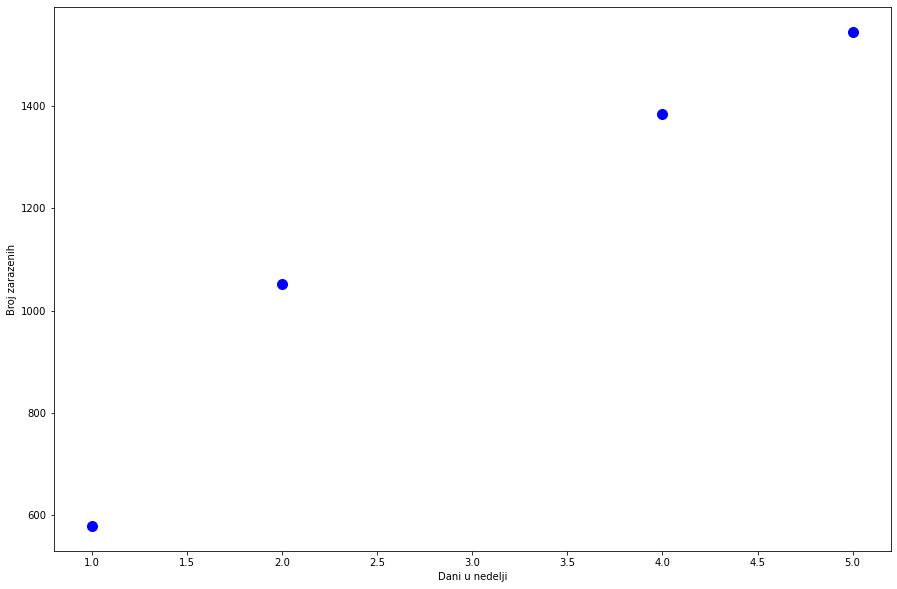

In [68]:
x=[1.,2.,4.,5.]
y=[579.,1053.,1384.,1545.]

plot_points(x,y)

#### Koeficijente kvadratnog splajna određujemo rešavanjem sistema linearnih jedančina, ali taj sistem formiramo na drugačiji način u odnosu na sistem koji smo rešavali na početku predavanja.
#### Sistem linearnih jedančina formiramo pomoću uslova koje kvadratni splajn mora da zadovoljava:
#### 1.Splajnovi moraju da prolaze kroz date tačke. Prvi splajn mora da prolazi kroz prvu i drugu, drugi kroz drugu i treću, treći kroz četvrtu i petu.
#### 2. Prvi izvod splajnova u unturašnjim tačkama moraju da budu jednaki. Prvi izvod prvog i drugog splajna moraju da budu jedanki u drugoj tački, prvi izvod drugog i trećeg splajna moraju da budu jednaki u trećoj tački.
#### Formiramo sada redom jedančine za naš primer pomoću uslova 1. i 2.
#### Pre toga samo napomena da je naš zadatak da odredimo koeficijente u ovom slučaju 3 kvadratna polinoma, a opšti oblik kvadratnog polinoma koji koristimo je:
#### $$p(x)=ax^2+bx+c$$

#### 1. Splajnovi moraju da prolaze kroz date tačke (1,579), (2,1053), (4,1384), (5,1545):
#### $$a_1\cdot 1^2+b_1\cdot 1+c_1=579\\a_1\cdot 2^2+b_1\cdot 2+c_1=1053\\a_2\cdot 2^2+b_2\cdot 2+c_2=1053\\a_2\cdot 4^2+b_2\cdot 4+c_2=1384\\a_3\cdot 4^2+b_3\cdot 4+c_3=1384\\a_3\cdot 5^2+b_3\cdot 5+c_3=1545$$

#### 2. Prvi izvod splajnova u unturašnjim tačkama (2,1053), (4,1384) moraju da budu jednaki:
#### $$2\cdot 2\cdot a_1+b_1=2\cdot 2\cdot a_2+b_2\\2\cdot 4\cdot a_2+b_2=2\cdot 4\cdot a_3+b_3$$

#### Vidimo da imamo 8 jednačina, a 9 nepoznatih koeficjenata. 
#### Ovo je normlano kod formiranja kvadratnog splajna, i nije vezano za naš primer. Ako imamo $n$ tačaka, odnosno $n-1$ splajnova, gde svaki splajn ima 3 nepoznate, uvek ćemo pomoću uslova dobiti:
#### $$1 + 2(n-2) + 1 + n-2 = 2 + 2n-4 + n - 2 = 3n-4$$
#### jednačina. 
#### Koliko nepoznatih imamo? Pošto imamo $n-1$ splajnova, a svaki ima 3 nepoznata koeficijenta imamo:
#### $$3(n-1)=3n-3$$
#### nepoznatih. Znači nedostaje nam jedna jednačina.
#### Postoji više dodatnih uslova pomoću kojih se rešava problem nedostajuće jednačine i ti uslovi se obično zovu granični uslovi.
#### Jedan od graničnih uslova koji se često koristi kod kvadratnog splajna je tzv. *prirodni splajn* kod koga je koeficijent uz $x^2$ kod prvog splajna jednak nuli. Tada je prvi splajn prava, a ne kvadratni polinom, pošto je $a_1=0$.

#### Koristimo uslov za prirodni splajn, formiramo i rešavamo sistem jedančina.
#### $$\begin{bmatrix}1 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\0 & 0 & 2^2 & 2 & 1 & 0 & 0 & 0\\0 & 0 & 4^2 & 4 & 1 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 4^2 & 4 & 1\\0 & 0 & 0 & 0 & 0 & 5^2 & 5 & 1\\1 & 0 & -4 & -1 & 0 & 0 & 0 & 0\\0 & 0 & 8 & 1 & 0 & -8 & -1 & 0\end{bmatrix}\begin{bmatrix}b_1\\c_1\\a_2\\b_2\\c_2\\a_3\\b_3\\c_3\end{bmatrix}=\begin{bmatrix}579\\1053\\1053\\1384\\1384\\1545\\0\\0\end{bmatrix}$$

In [69]:
def qudratic_spline(x,y):
    n=len(x)
    dim_A=3*n-4
    A=np.zeros([dim_A,dim_A])
    b=np.zeros([dim_A,1])
     
    A[0,0]=x[0]
    A[0,1]=1
    
    A[1,0]=x[1]
    A[1,1]=1
    
    b[0]=y[0]
    b[1]=y[1]
    
    row_pos=2
    col_pos=2
    for i in range(1,n-1):
        for j in range(3):
            A[row_pos,col_pos+j]=x[i]**(2-j)
            A[row_pos+1,col_pos+j]=x[i+1]**(2-j)
            
            b[row_pos]=y[i]
            b[row_pos+1]=y[i+1]
            
        row_pos=row_pos+2
        col_pos=col_pos+3
        
    A[row_pos,0]=1
    A[row_pos,2]=-2*x[1]
    A[row_pos,3]=-1
        
    row_pos=row_pos+1
    col_pos=2

    for i in range(2,n-1):
        A[row_pos,col_pos]=2*x[i]
        A[row_pos,col_pos+1]=1
        col_pos=col_pos+3
        A[row_pos,col_pos]=-2*x[i]
        A[row_pos,col_pos+1]=-1
        row_pos=row_pos+1
        
    #print(A)
    #print(b)
    
    return np.insert(la.solve(A,b),0,0)

In [70]:
x=[1.,2.,4.,5.]
y=[579.,1053.,1384.,1545.]

my_kv_splajn = qudratic_spline(x,y)

In [71]:
print(my_kv_splajn)

[    0.     474.     105.    -154.25  1091.    -512.     304.   -2575.
  6820.  ]


In [72]:
#0*x^2 + 474*x^1 + 105
#-154.25*x^2 + 1091*x^1 - 512
#304*x^2 - 2575*x^1 + 6820

In [73]:
def eval_spline(spline,x,points):
    n=len(points)
    results=np.zeros(n)
    for i in range(n):
        if points[i]<x[0]:
            p=spline[0:2];
            results[i]=np.polyval(p,points[i])
        if points[i]>x[len(x)-1]:
            p=spline[len(spline)-1:len(spline)-1]
            results[i]=np.polyval(p,points[i])
        for j in range(0,len(x)-1):
            if x[j]<=points[i] and points[i]<=x[j+1]:
                p=spline[3*j:3*j+3]
                results[i]=np.polyval(p,points[i])
                break
    return results

In [74]:
x=[1.,2.,4.,5.]
y=[579.,1053.,1384.,1545.]

my_kv_splajn = qudratic_spline(x,y)

print(eval_spline(my_kv_splajn,x,[3]))
print(-154.25*3**2 + 1091*3 - 512)
print('tacna_vrednost =  1384')

[1372.75]
1372.75
tacna_vrednost =  1384


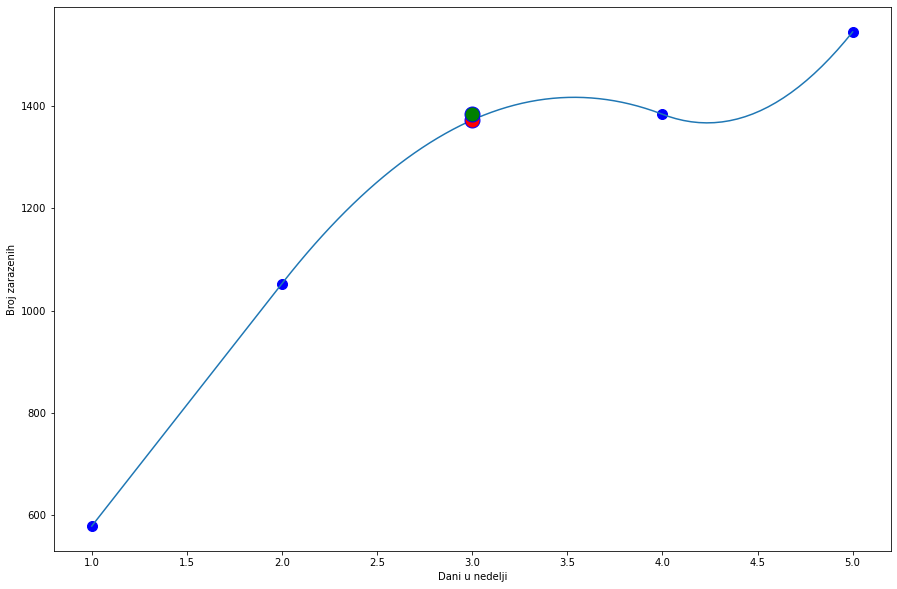

In [75]:
x=[1.,2.,4.,5.]
y=[579.,1053.,1384.,1545.]

plot_points(x,y)

my_kv_splajn = qudratic_spline(x,y)
xp=np.linspace(1,np.max(x),100)

plt.plot(xp,eval_spline(my_kv_splajn,x,xp))

plt.plot(3,eval_spline(my_kv_splajn,x1,[3]),'ob',markersize=15,markerfacecolor='r')

plt.plot(3,y[2],'ob',markersize=15,markerfacecolor='g')

## Kubni splajn

#### Kod kubnog splajna između svake dve tačke formira se kubni polinom:
#### $$ax^3+bx^2+cx+d$$
#### Pošto kubni polinom ima 4 koeficijenta, u slučaju da imamo n tačaka, tj. $n-1$ splajn ukupno imamo $4n-4$ nepoznata koeficijenta. Što znači da nam treba $4n-4$ jednačine.
#### Kao što smo videli ranije, uslovi za kvadratni splajn nam daju $3n-4$ jednačine tako da nam nedostaje $n$ uslova.
#### Iz tog razloga kod kubnog splajna dodaje je se i uslov poklapanja drugih izvoda u unutrašnjim tačkama. Grubo gledano to znači da neće biti naglih promena zakrivljenosti u unutrašnjim tačkama.
#### Do promena zakrljivenosti dolazi u slučaju da drugi izvod funkcije menja znak u nekoj tački. Na grafiku ispod data je funkcija 
#### $$f(x)=5x^3+2x^2-3x$$
#### Njen drugi izvod je $f(x)=30x+4$. Drugi izvod menja znak u tački $x=-2/15$. To znači da je funkcija do tačke $x=-\frac{2}{15}$ konkavna, a od tačke $x=-\frac{2}{15}$ konvenska, tj. njena zakrivljenost se promenila.
#### Time što zhavevamo da su drugi izvod splajnova u unutrašnjim tačkama jednaki, obezbedili smo da neće biti promene zakrivljenosti splajna u unutrašnjim tačkama.
#### Grafik funkcije $f(x)=5x^3+2x^2-3x$:

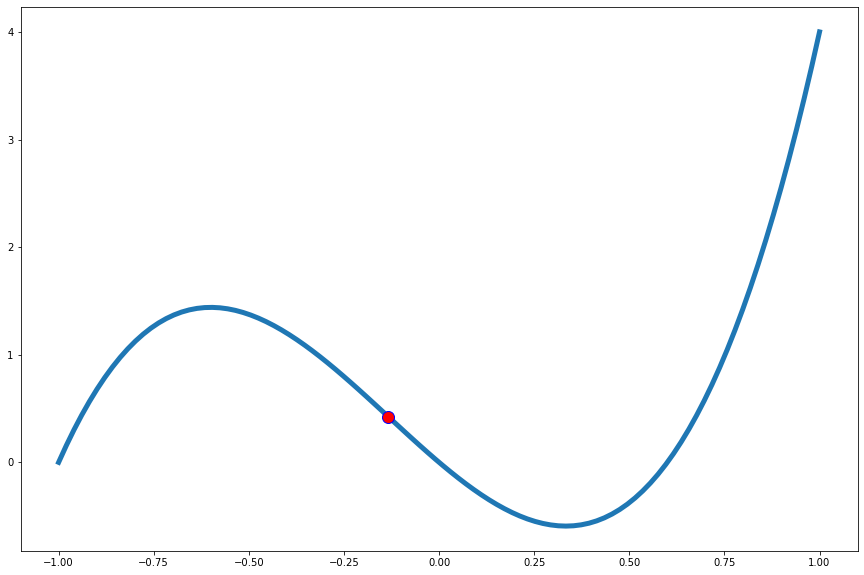

In [76]:
plt.figure(figsize=(15, 10))
xp=np.linspace(-1,1,100)
plt.plot(xp,5*xp**3+2*xp**2-3*xp, linewidth=5)

xp=-2./15.
plt.plot(xp,5*xp**3+2*xp**2-3*xp, 'ob', markersize=12, markerfacecolor='r')

#### Grafik drugog izovda funkcije $f(x)=5x^3+2x^2-3x$:

[-0.13333333]


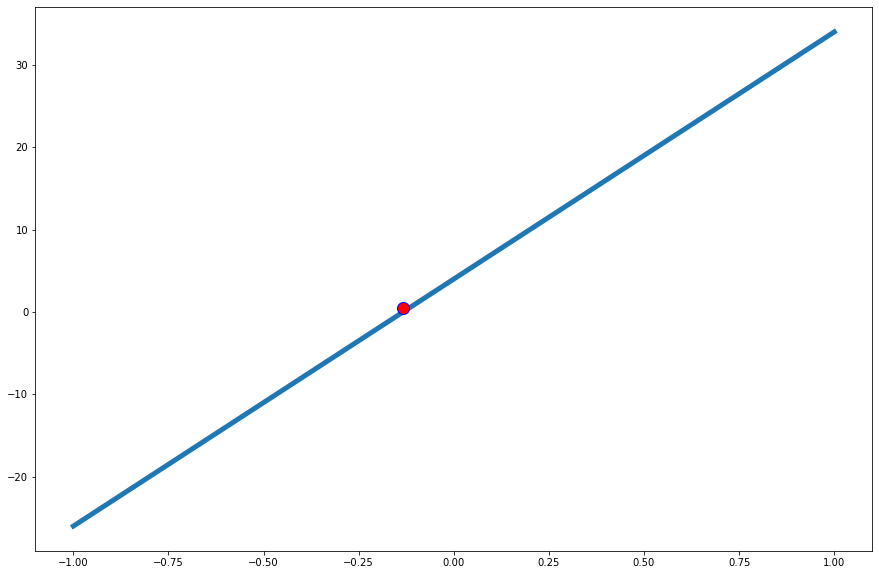

In [77]:
plt.figure(figsize=(15, 10))
xp=np.linspace(-1,1,100)
plt.plot(xp,30*xp+4, linewidth=5)

print(np.roots([30, 4]))
xp=-0.13333
plt.plot(xp,5.*xp**3+2*xp**2-3.*xp, 'ob', markersize=12, markerfacecolor='r')

#### Pošto unutrašnjih tačaka ima $n-2$, a zahtevamo poklapanje drugog izvoda u njima to znači da smo dobili još $n-2$ uslova.
#### Dakle, nedostaje nam još 2 uslova odnosno još dve jednačine. Ta dva uslova biraju se na različite načine, a u nastavku su navedena dva najčešće korišćena.
#### 1. Prirodni splajn (natural spline) – pretpostavimo da su drugi izvodi u kranjim tačkama jednaki nuli. 
#### Ovaj uslov znаči da će u okolini pre prve i nakon poslednje tačke funkcija biti linearna jer u tački u kojoj je drugi izvod nula funkcija menja zakrivljenost pa je tokom te promene u jednom malom delu linearna (pogledati grafik funkcije iznad). Cilj ovog uslova je da splajn oko krajeva nema oscilacija, tj. da eventualne ekstrapolacije bilzu krajnjih tačaka ne budu "nepredvidive". Naziv "pirordan" potiče od tumačenja splajna kao elastičnnog štapa koji smo počeli da savijamo u krajnjim tačkama.
#### 2. “Not-a-knot” splajn – pretpostaviti jednakost trećeg izvoda u drugoj i preposlednjoj tački. Ovaj splajn zove se “Not-a-knot” jer faktički druga i pretposlednja tačka nisu više čvorovi, u smislu da je splajn pre i posle njih isti. Recimo da imamo neku tačku $x_i$, pogledaćemo kako izgleda jednakost dva kubna polinoma u toj tački redom do trećeg izvoda:
#### $$a_1x_i^3+b_1x_i^2+c_1x_i+d_1=a_2x_i^3+b_2x_i^2+c_2x_i+d_2$$
#### $$3a_1x_i^2+2b_1x_i+c_1=3a_2x_i^2+2b_2x_i+c_2$$
#### $$6a_1x_i^2+2b_1=6a_2x_i^2+2b_2$$
#### $$6a_1=6a_2$$
#### Ako krenemo od jednakosti trećeg izvoda iz čega sledi $6a_1=6a_2$ i zamenjujemo redom do gore, vidimo da su dva kubna polinoma jednaka, što u našem slučaju znači da se splajn ne menja u drugoj i preposlednjoj tački.

#### Kubni splajn je najčešće korišćena splajn metoda jer pruža najbolji odnos između kompleksnosti metode i kvaliteta interpolacije. Većina alata koji nude interpolaciju splajnom, nude kubni splajn.
#### Prikazaćemo sada upotrebnu kubnog splajna za naša dva primera (sa 4 i 10 tačaka).

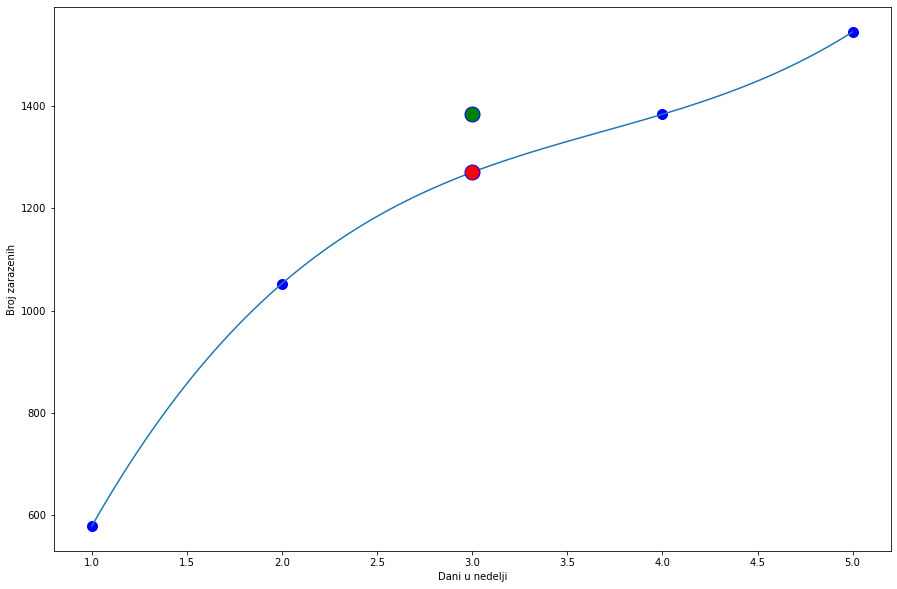

In [78]:
from scipy.interpolate import CubicSpline

x=[1.,2.,4.,5.]
y=[579.,1053.,1384.,1545.]

plot_points(x,y)

cs = CubicSpline(x, y) #‘not-a-knot’ (default)
xp=np.linspace(1,np.max(x),100)

plt.plot(xp,cs(xp))

plt.plot(3,cs(3.0),'ob',markersize=15,markerfacecolor='r')

plt.plot(3,y[2],'ob',markersize=15,markerfacecolor='g')

In [79]:
print(cs(3.0))
print('tacna_vrednost =  1384')

1270.6666666666665
tacna_vrednost =  1384


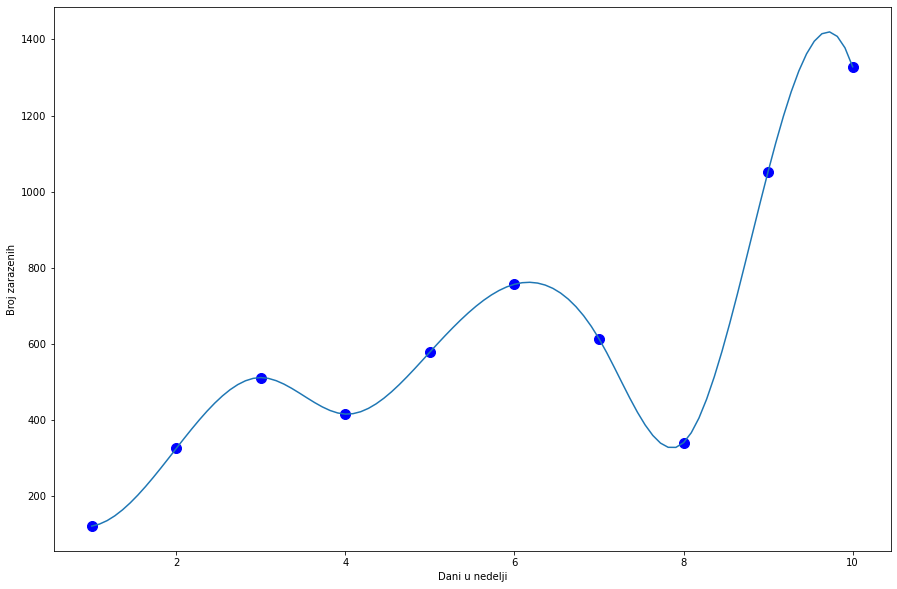

In [80]:
x=range(1,11)
y=[122,  326,  512,  416,  579,  757,  614,  341, 1053, 1328];
plot_points(x,y)

cs = CubicSpline(x, y) #‘not-a-knot’ (default)
xp=np.linspace(1,np.max(x),100)

plt.plot(xp,cs(xp))

#### Poredimo kubni i kvadratni splajn.

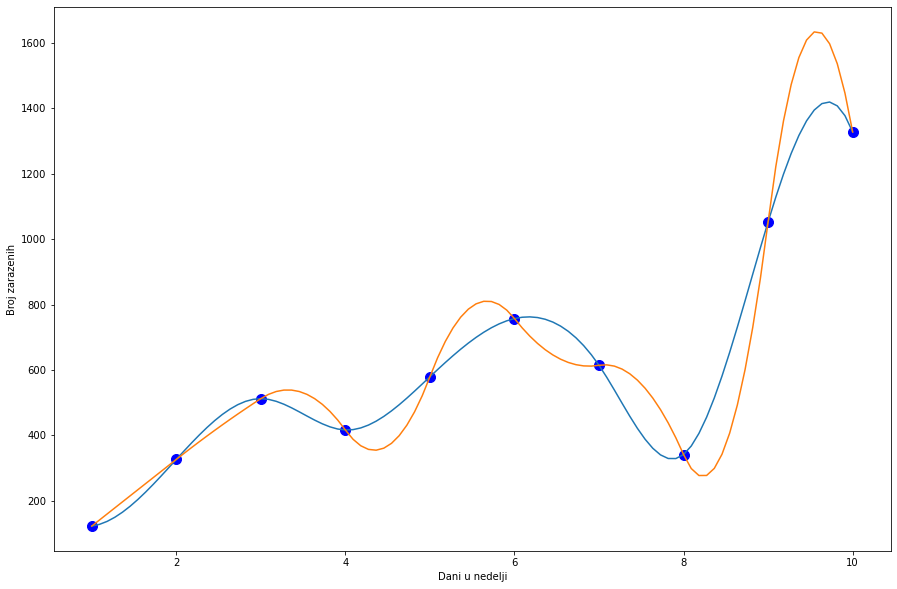

In [81]:
x=range(1,11)
y=[122,  326,  512,  416,  579,  757,  614,  341, 1053, 1328];
plot_points(x,y)

cs = CubicSpline(x, y) #‘not-a-knot’ (default)
xp=np.linspace(1,np.max(x),100)

plt.plot(xp,cs(xp))

my_kv_splajn = qudratic_spline(x,y)

plt.plot(xp,eval_spline(my_kv_splajn,x,xp))

#### Poredimo kubni i kvadratni splajn i lagražnov interpolacioni polinom.

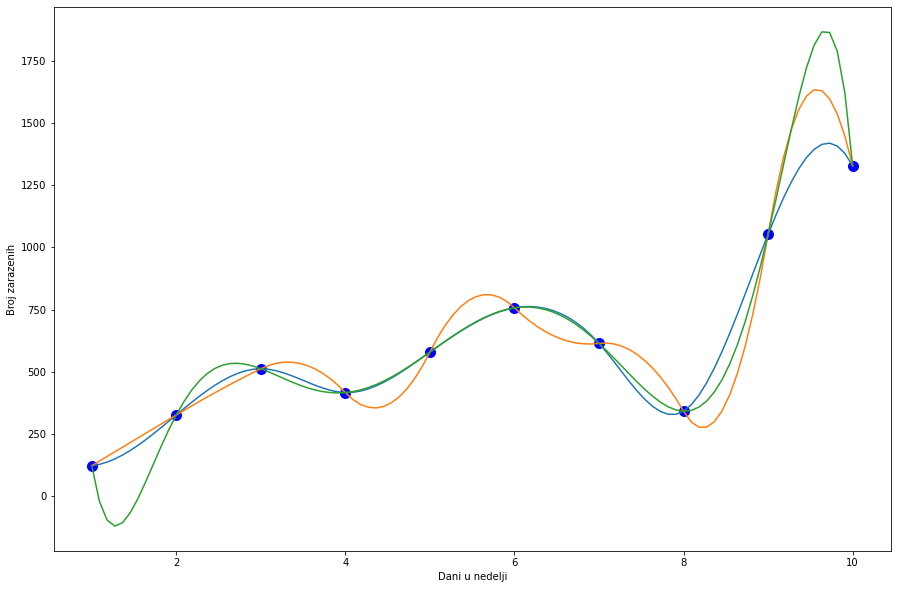

In [82]:
x=range(1,11)
y=[122,  326,  512,  416,  579,  757,  614,  341, 1053, 1328]
plot_points(x,y)

cs = CubicSpline(x, y) #‘not-a-knot’ (default)
xp=np.linspace(1,np.max(x),100)

plt.plot(xp,cs(xp))

my_kv_splajn = qudratic_spline(x,y)

plt.plot(xp,eval_spline(my_kv_splajn,x,xp))

linterp_pol=linterp(x,y)
plt.plot(xp,np.polyval(linterp_pol,xp))

In [83]:
print([y[8],y[9]])
print(np.polyval(linterp_pol,9.5))
print(eval_spline(my_kv_splajn,x,[9.5]))
print(cs(9.5))

[1053, 1328]
1773.264816865354
[1625.25]
1380.0543842322224


## Ekstrapolacija

#### Ekstrapolacija je upotreba interpolacionih polinoma za izračunavanje vrednosti van opsega x-koordinata tačka koje su date.
#### U našem primeru ekstrapolacija bilo bi izračunavanje broja zaraženih za svaki dan posle dana 10, ili teoretski moguće za svaki dan pre dana 1.
#### Ekstrapolacija može da rezultuje nepredvidim vrednostima, naročito ako se koristi jedan interpolacioni polinom koji, kao što ste videli, može da ima velike oscilacije ako imamo puno datih tačaka.

In [84]:
print(y[9]) #poslednje y koje imamo
print(np.polyval(linterp_pol,11)) #ekstrapolacija pomocu Lagrazovog polinoma za x=11
print(eval_spline(my_kv_splajn,x,[11])) #ekstrapolacija pomocu kvadratnog splajna za x=11
print(cs(11)) #ekstrapolacija pomocu kubnog 'not-a-knot' splajna za x=11

1328
-22932.99999871727
[0.]
-992.8701477155619


#### U nastavku je primer 'prirodnog' splajna kod koga je ekstrapolacija bar u oklini krajnjih tačaka bolja nego kod 'not-a-knot'.

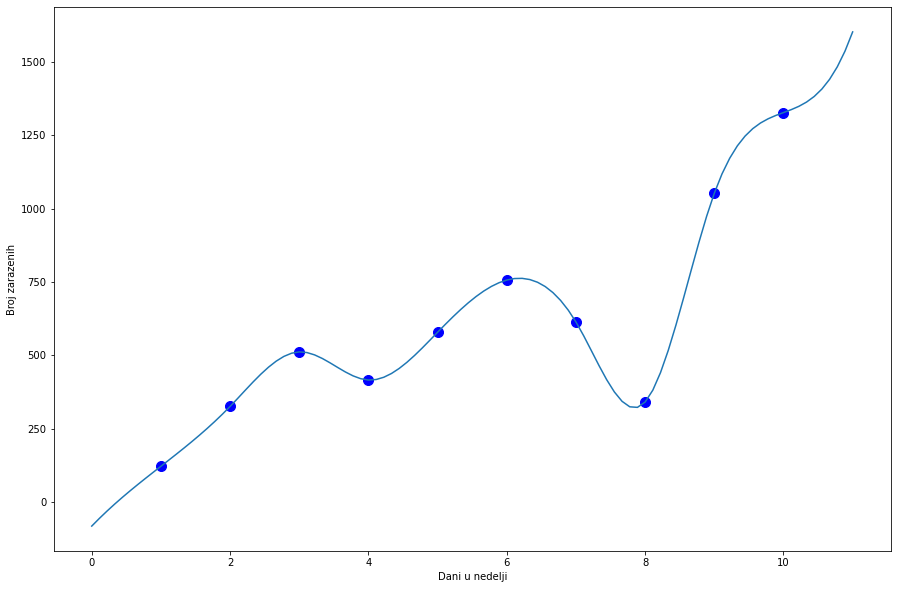

In [85]:
from scipy.interpolate import CubicSpline

x=range(1,11)
y=[122,  326,  512,  416,  579,  757,  614,  341, 1053, 1328]


plot_points(x,y)

cs = CubicSpline(x, y, bc_type='natural')
xp=np.linspace(0,np.max(x)+1,100)

plt.plot(xp,cs(xp))

In [86]:
print(y[9])
print(np.polyval(linterp_pol,11))
print(eval_spline(my_kv_splajn,x,[11]))
print(cs(11)) #ekstrapolacija pomocu kubnog prirodnog splajna za x=11

1328
-22932.99999871727
[0.]
1603.0
